In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #visualization
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings

import warnings
# ignore warnings
warnings.filterwarnings("ignore")

from subprocess import check_output
print(check_output(["ls", "../input/biomechanical-features-of-orthopedic-patients"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


column_2C_weka.csv
column_3C_weka.csv



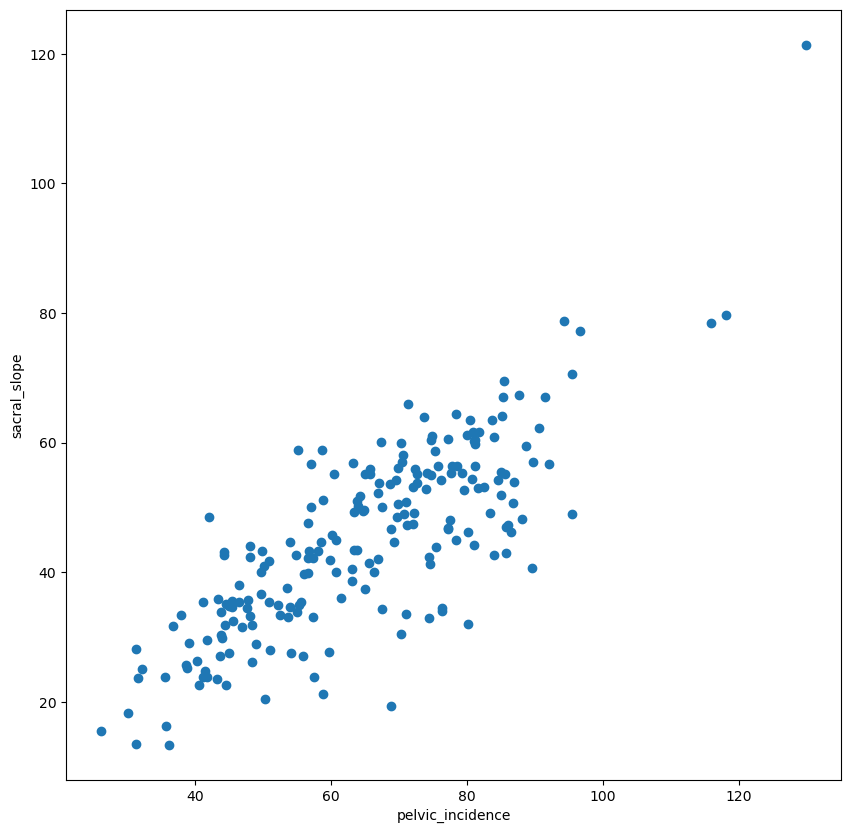

In [3]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data = pd.read_csv('../input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score:  0.6458410481075871


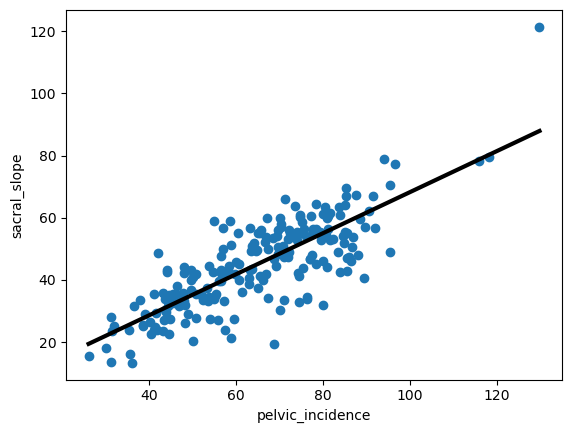

In [4]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1) #linspace: generates linearly spaced vectors
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [17]:
#Multiple Linear Regression
x2 = data.loc[:,["pelvic_incidence","pelvic_radius"]].values
y2 = data.loc[:,"sacral_slope"].values.reshape(-1,1)

In [18]:
y2

array([[ 40.47523153],
       [ 28.99595951],
       [ 46.61353893],
       [ 44.64413017],
       [ 40.06078446],
       [ 26.32829311],
       [ 37.56859203],
       [ 34.61114218],
       [ 30.25643716],
       [ 31.67546874],
       [ 36.66563548],
       [ 13.51656811],
       [ 28.95099521],
       [ 33.11134196],
       [ 33.11134196],
       [ 31.78091509],
       [ 43.47247456],
       [ 28.13134236],
       [ 25.25316339],
       [ 29.475889  ],
       [ 29.7448813 ],
       [ 33.85711014],
       [ 38.65980825],
       [ 32.47119229],
       [ 13.3669307 ],
       [ 27.47443163],
       [ 15.38846783],
       [ 27.07208024],
       [ 22.61986495],
       [ 41.9872125 ],
       [ 35.41705528],
       [ 35.31121344],
       [ 27.49283695],
       [ 25.67681568],
       [ 27.59729587],
       [ 23.657997  ],
       [ 25.10160871],
       [ 16.26020471],
       [ 26.99583839],
       [ 33.40782459],
       [ 23.79077387],
       [ 38.04704253],
       [ 34.62415508],
       [ 39

In [19]:
print(x2)

[[ 63.0278175   98.67291675]
 [ 39.05695098 114.4054254 ]
 [ 68.83202098 105.9851355 ]
 [ 69.29700807 101.8684951 ]
 [ 49.71285934 108.1687249 ]
 [ 40.25019968 130.3278713 ]
 [ 53.43292815 120.5675233 ]
 [ 45.36675362 117.2700675 ]
 [ 43.79019026 125.0028927 ]
 [ 36.68635286  84.24141517]
 [ 49.70660953 108.6482654 ]
 [ 31.23238734 120.0553988 ]
 [ 48.91555137 119.321358  ]
 [ 53.5721702  110.9666978 ]
 [ 57.30022656 116.8065868 ]
 [ 44.31890674 124.1158358 ]
 [ 63.83498162 112.3094915 ]
 [ 31.27601184 129.0114183 ]
 [ 38.69791243 123.1592507 ]
 [ 41.72996308 116.5857056 ]
 [ 43.92283983 134.4610156 ]
 [ 54.91944259 125.2127163 ]
 [ 63.07361096 106.4243295 ]
 [ 45.54078988 117.9808303 ]
 [ 36.12568347 115.5771163 ]
 [ 54.12492019 121.447011  ]
 [ 26.14792141 125.2032956 ]
 [ 43.58096394 109.271634  ]
 [ 44.5510115  111.0729197 ]
 [ 66.87921138 113.4770183 ]
 [ 50.81926781 112.192804  ]
 [ 46.39026008  98.77454633]
 [ 44.93667457 117.9803245 ]
 [ 38.66325708 124.914118  ]
 [ 59.59554032

In [20]:
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x2,y2)

print("b0: ", multiple_linear_regression.intercept_)
print("b1,b2: ",multiple_linear_regression.coef_)

b0:  [24.08623516]
b1,b2:  [[ 0.60582435 -0.15080267]]


In [24]:
multiple_linear_regression.predict(np.array([63,98]).reshape(1,-1))

array([[47.47450759]])

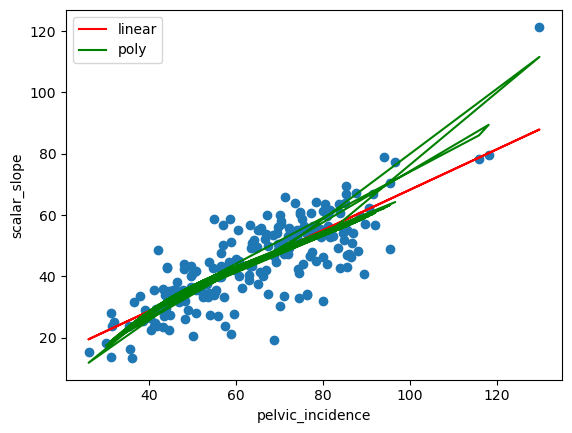

In [40]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree = 3)
x_polynomial = polynomial_regression.fit_transform(x)

poly_regression = LinearRegression()
poly_regression.fit(x_polynomial,y)

y_lin = reg.predict(x)
y_poly = poly_regression.predict(x_polynomial)

plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel("scalar_slope")
plt.plot(x, y_lin, color='red', label = "linear")
plt.plot(x, y_poly, color= "green", label = "poly")
plt.legend()
plt.show()




In [42]:
from sklearn.metrics import r2_score

print("r_square score for linear regression: ", r2_score(y,y_lin))

print("r_square score for polynomial regression: ", r2_score(y,y_poly))

r_square score for linear regression:  0.6458410481075871
r_square score for polynomial regression:  0.6739189064848099


In [43]:
print(reg.predict([[120]]))
print(poly_regression.predict(polynomial_regression.fit_transform([[120]])))

[[81.43039223]]
[[92.48465106]]
